In [3]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
# cv2 to matplotlib
def cv2mat(img):
    g,b,r = cv2.split(img)
    ret = cv2.merge([r,b,g])
    return ret
def cv_show(img):
    plt.imshow(cv2mat(img))

## 图片读取

In [5]:
img_cat = cv2.imread("./01_picture/01_cat.jpg")
#  cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # 转换颜色类型
print(type(img_cat))
img_cat[:,:,0],img_cat.shape

<class 'numpy.ndarray'>


(array([[142, 146, 151, ..., 156, 155, 154],
        [107, 112, 117, ..., 155, 154, 153],
        [108, 112, 118, ..., 154, 153, 152],
        ...,
        [162, 157, 142, ..., 181, 170, 149],
        [140, 147, 139, ..., 167, 123, 104],
        [154, 154, 121, ..., 185, 130, 129]], dtype=uint8),
 (414, 500, 3))

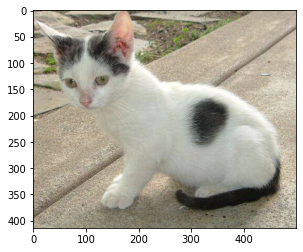

In [6]:
def cv_show1(img,name="image"):
    cv2.imshow(name,img)
    cv2.waitKey() #ms 不输入代表任意键销毁窗口
    cv2.destroyAllWindows()
cv_show(img_cat)

In [7]:
img_cat_gray = cv2.imread("01_picture/01_cat.jpg", cv2.IMREAD_GRAYSCALE)
print(img_cat_gray.shape)
cv_show1(img_cat_gray)

(414, 500)


## 视频处理

In [6]:
vc = cv2.VideoCapture("02_Video/00_Scenery.mp4")
if vc.isOpened():
    open_ , frame = vc.read()  # open_ = True
else:
    open_ = False
print(open_)

True


In [7]:
while open_:
    ret, frame = vc.read() # 视频结束后 ret=False, frame=None
    if frame is None:
        break
    if ret == True:
        cv2.imshow("result", frame)
    if cv2.waitKey(10) & 0xFF == 27:
        break
cv2.destroyAllWindows()

## 通道提取

In [8]:
g,b,r = cv2.split(img_cat)
graph = np.c_[g,b,r]  # 等价 np.hstack([])
cv_show1(graph)
b.shape, graph.shape

((414, 500), (414, 1500))

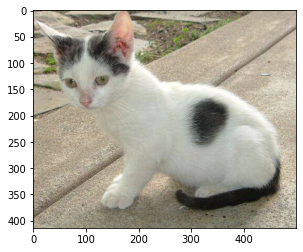

In [9]:
img_cat_merge = cv2.merge([g,b,r])
cv_show(img_cat_merge)

## 边界填充

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x24692aedb00>)

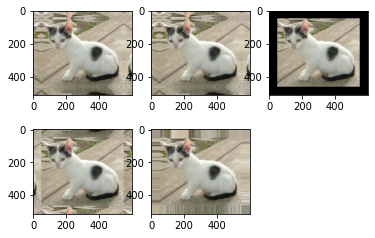

In [10]:
top, bottom, left, right = 50,50,50,50
reflect_101 = cv2.copyMakeBorder(img_cat, top, bottom, left, right, borderType=cv2.BORDER_REFLECT_101)
reflect = cv2.copyMakeBorder(img_cat, top, bottom, left, right, borderType=cv2.BORDER_REFLECT)
constant = cv2.copyMakeBorder(img_cat, top, bottom, left, right, borderType=cv2.BORDER_CONSTANT, value=0)
wrap = cv2.copyMakeBorder(img_cat, top, bottom, left, right, borderType=cv2.BORDER_WRAP)
replicate = cv2.copyMakeBorder(img_cat, top, bottom, left, right, borderType=cv2.BORDER_REPLICATE)

reflect_101 = cv2mat(reflect_101)
reflect = cv2mat(reflect)
constant = cv2mat(constant)
wrap = cv2mat(wrap)
replicate = cv2mat(replicate)

plt.subplot(231), plt.imshow(reflect_101)
plt.subplot(232), plt.imshow(reflect)
plt.subplot(233), plt.imshow(constant)
plt.subplot(234), plt.imshow(wrap)
plt.subplot(235), plt.imshow(replicate)

## 图像融合

In [11]:
img_dog = cv2.imread("01_Picture/03_dog.jpg")
img_dog.shape, img_cat.shape

((429, 499, 3), (414, 500, 3))

In [12]:
# resize
img_dog = cv2.resize(img_dog, (500,414))
img_dog.shape

(414, 500, 3)

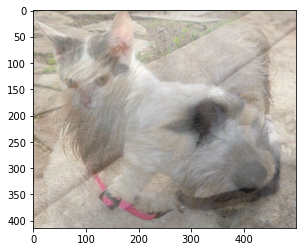

In [13]:
merge_dog_cat = cv2.addWeighted(img_cat, 0.5, img_dog, 0.5, 0)
plt.imshow(cv2mat(merge_dog_cat))

In [14]:
img_dog[:1,:3,:3],img_cat[:1,:3,:3],merge_dog_cat[:1,:3,:3]

(array([[[191, 194, 209],
         [180, 183, 198],
         [165, 170, 185]]], dtype=uint8),
 array([[[142, 151, 160],
         [146, 155, 164],
         [151, 160, 169]]], dtype=uint8),
 array([[[166, 172, 184],
         [163, 169, 181],
         [158, 165, 177]]], dtype=uint8))

## 图像缩放

In [15]:
img_resize = cv2.resize(img_cat, (0,0), fx=2,fy=1)
img_cat.shape,img_cat[:1,:5,:5],img_resize.shape,img_resize[:1,:5,:5]

((414, 500, 3),
 array([[[142, 151, 160],
         [146, 155, 164],
         [151, 160, 169],
         [150, 159, 169],
         [142, 151, 161]]], dtype=uint8),
 (414, 1000, 3),
 array([[[142, 151, 160],
         [143, 152, 161],
         [145, 154, 163],
         [147, 156, 165],
         [150, 159, 168]]], dtype=uint8))

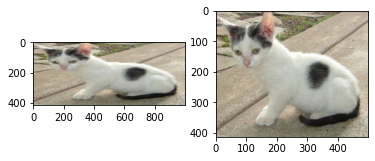

In [16]:
plt.subplot(121)
plt.imshow(cv2mat(img_resize))
plt.subplot(122)
plt.imshow(cv2mat(img_cat))

## 图像阈值

(<matplotlib.image.AxesImage at 0x24692cbb080>, 120.0)

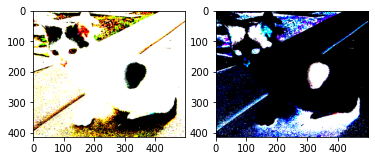

In [17]:
thresh_binary, img_binary = cv2.threshold(img_cat, thresh=120, maxval=255, type=cv2.THRESH_BINARY)
thresh_binary_inv, img_binary_inv = cv2.threshold(img_cat, thresh=120, maxval=255, type=cv2.THRESH_BINARY_INV)
plt.subplot(121)
plt.imshow(cv2mat(img_binary))
plt.subplot(122)
plt.imshow(cv2mat(img_binary_inv)),thresh_binary_inv

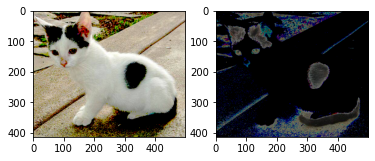

In [18]:
thresh_tozero, img_tozero = cv2.threshold(img_cat, 120, 255, type=cv2.THRESH_TOZERO)
img_tozero_inv = cv2.threshold(img_cat, 120, 255, type=cv2.THRESH_TOZERO_INV)[1]
plt.subplot(121)
plt.imshow(cv2mat(img_tozero))
plt.subplot(122)
plt.imshow(cv2mat(img_tozero_inv))

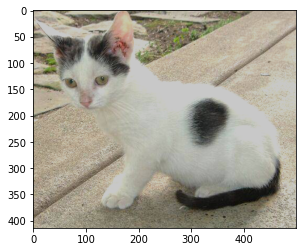

In [19]:
img_trunc = cv2.threshold(img_cat, thresh=200, maxval=255, type=cv2.THRESH_TRUNC)[1]
plt.imshow(cv2mat(img_trunc))

## 平滑处理

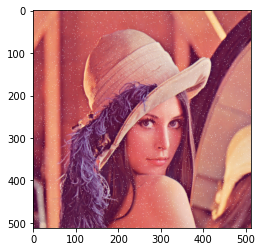

In [20]:
img_lena = cv2.imread("01_Picture/04_LenaNoise.png")
plt.imshow(cv2mat(img_lena))

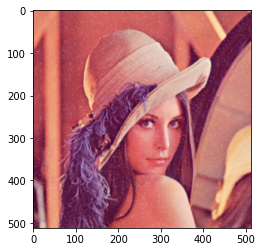

In [21]:
# 均值滤波
img_lena_blur = cv2.blur(img_lena,(3,3))
plt.imshow(cv2mat(img_lena_blur))

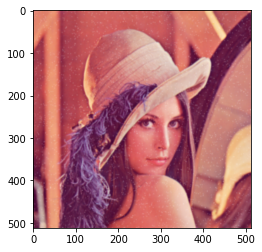

In [22]:
# 高斯滤波
img_lena_gaussianblur = cv2.GaussianBlur(img_lena,(7,7),1)
plt.imshow(cv2mat(img_lena_gaussianblur))

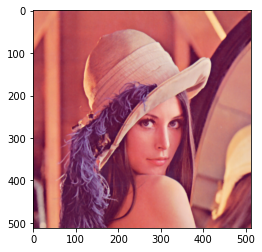

In [23]:
# 中值滤波
img_lena_median = cv2.medianBlur(img_lena, 3)
plt.imshow(cv2mat(img_lena_median))

## 腐蚀与膨胀

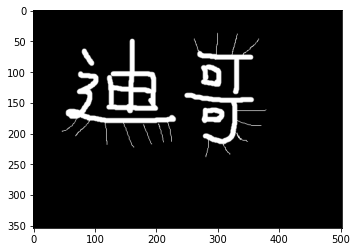

In [24]:
img_dige = cv2.imread("01_Picture/05_Dige.png")
cv_show(img_dige)

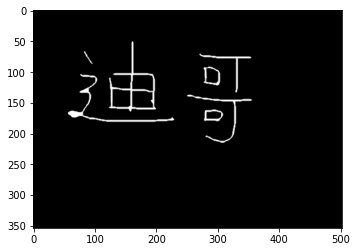

In [25]:
# 腐蚀
import numpy as np
img_dige_erode = cv2.erode(img_dige,np.ones((6,6),dtype=np.uint8),iterations=1)
cv_show(img_dige_erode)

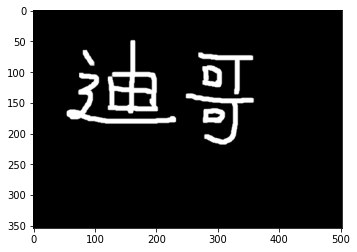

In [26]:
# 膨胀
img_dige_dilate = cv2.dilate(img_dige_erode, np.ones((6,6),dtype=np.uint8), iterations=1)
cv_show(img_dige_dilate)

## 开闭梯度计算

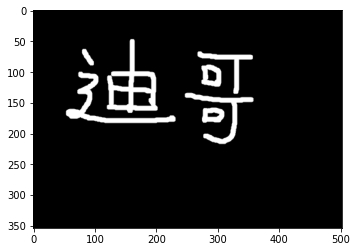

In [27]:
# 开运算- 先腐蚀再膨胀
img_dige_open = cv2.morphologyEx(img_dige, cv2.MORPH_OPEN, np.ones((5,5),dtype=np.uint8))
cv_show(img_dige_open)

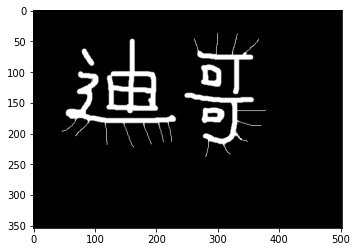

In [28]:
# 闭运算
img_dige_close = cv2.morphologyEx(img_dige, cv2.MORPH_CLOSE, np.ones((5,5),dtype=np.uint8))
cv_show(img_dige_close)

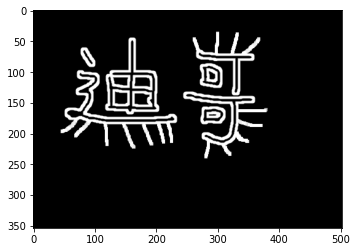

In [29]:
# 梯度计算 膨胀-腐蚀
img_dige_gradient = cv2.morphologyEx(img_dige, cv2.MORPH_GRADIENT, np.ones((5,5),dtype=np.uint8))
cv_show(img_dige_gradient)

## 礼帽与黑帽

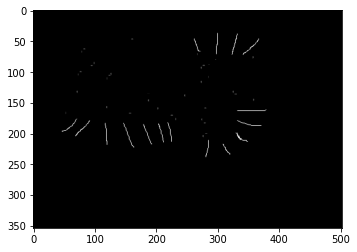

In [30]:
# tophat - 原始-开运算
img_dige_tophat = cv2.morphologyEx(img_dige, cv2.MORPH_TOPHAT, np.ones((5,5),np.uint8))
cv_show(img_dige_tophat)

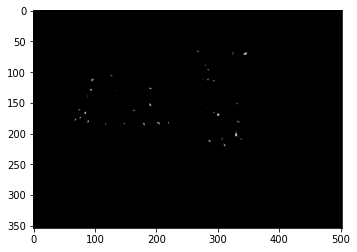

In [31]:
# blackhat - 闭运算-原始
img_dige_blackhat = cv2.morphologyEx(img_dige, cv2.MORPH_BLACKHAT, np.ones((5,5),np.uint8))
cv_show(img_dige_blackhat)

## Sobel 算子

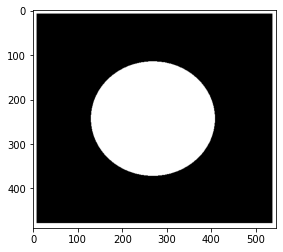

In [32]:
img_pie = cv2.imread("01_Picture/06_pie.png")
cv_show(img_pie)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


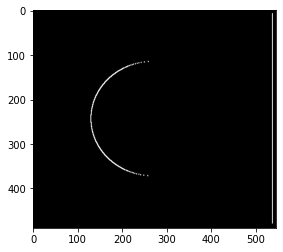

In [33]:
# sobel 沿着 x 求梯度
sobelx = cv2.Sobel(img_pie, cv2.CV_64F, 1, 0, ksize=3)
cv_show(sobelx)

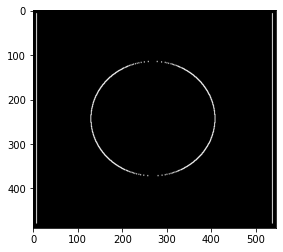

In [34]:
sobelx = cv2.Sobel(img_pie, cv2.CV_64F, 1, 0, ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
cv_show(sobelx)

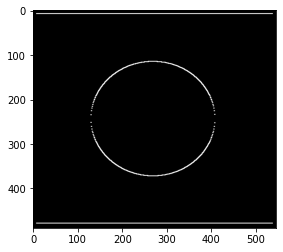

In [35]:
# sobel 沿着 y 求梯度
sobely = cv2.Sobel(img_pie, cv2.CV_64F, 0, 1, ksize=3)
sobely = cv2.convertScaleAbs(sobely)
cv_show(sobely)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


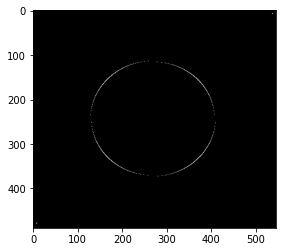

In [36]:
# 同时求梯度效果不好
sobelxy = cv2.Sobel(img_pie, cv2.CV_64F, 1, 1, ksize=3)
cv_show(sobelxy)

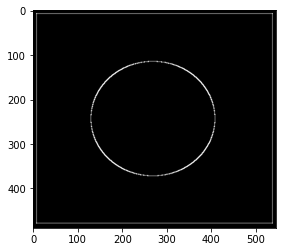

In [37]:
sobelxy = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)
cv_show(sobelxy)

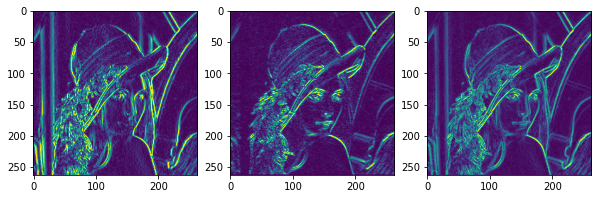

In [38]:
# 人照处理
img_lena_gray = cv2.imread("01_Picture/07_Lena.jpg", cv2.IMREAD_GRAYSCALE)
sobelx_lena = cv2.Sobel(img_lena_gray, cv2.CV_64F, 1, 0, ksize=3)
sobelx_lena = cv2.convertScaleAbs(sobelx_lena)
sobely_lena = cv2.Sobel(img_lena_gray, cv2.CV_64F, 0, 1, ksize=3)
sobely_lena = cv2.convertScaleAbs(sobely_lena)
sobelxy_lena = cv2.addWeighted(sobelx_lena,0.5,sobely_lena,0.5,0)

plt.figure(figsize=(10,5))
plt.subplot(131)
plt.imshow(sobelx_lena)
plt.subplot(132)
plt.imshow(sobely_lena)
plt.subplot(133)
plt.imshow(sobelxy_lena)

## Scharr 算子
比 sobel 对结构更敏感

In [39]:
scharrx_lena = cv2.Scharr(img_lena_gray, cv2.CV_64F, 1, 0)
cv_show1(scharrx_lena)
scharry_lena = cv2.Scharr(img_lena_gray, cv2.CV_64F, 0, 1)
cv_show1(scharry_lena)
scharrxy_lena = cv2.addWeighted(scharrx_lena,0.5, scharry_lena,0.5,0)
cv_show1(scharrxy_lena)

## Laplacian 算子

In [ ]:
laplacian_lena = cv2.Laplacian(img_lena_gray, cv2.CV_64F, ksize=3)
cv_show1(laplacian_lena)

## Canny

In [ ]:
lena_canny1 = cv2.Canny(img_lena_gray, 10,100)
lena_canny2 = cv2.Canny(img_lena_gray, 10,150)
lena_canny3 = cv2.Canny(img_lena_gray, 100,150)
lena_canny4 = cv2.Canny(img_lena_gray, 100,200)

res = np.hstack((lena_canny1,lena_canny2, lena_canny3, lena_canny4))
cv_show1(res)

## 图像金字塔

In [ ]:
img_am = cv2.imread("01_Picture/09_AM.png")
cv_show1(img_am)

In [ ]:
img_am_up = cv2.pyrUp(img_am)
cv_show1(img_am_up)

In [ ]:
img_am_down = cv2.pyrDown(img_am_up)
cv_show1(img_am_down)

## 拉普拉斯金字塔

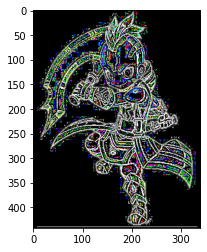

In [ ]:
img_down = cv2.pyrDown(img_am)
img_down_up = cv2.pyrUp(img_down)
img_lap = img_am - img_down_up
cv_show(img_lap)